# Machine Learning Summative Assessment

This course is assessed through a final project. The overall aim of this project is to examine the students understanding of modern machine learning techniques at the basic theoretical, intuitive as well as practical levels. With regard to practical applications we use Python, as well related libraries such as Numpy, Scikit and TensorFlow.
The project is centred around the MNIST data set of handwritten digits. It consists of grayscale images of hand written digits, as well as the true labels/digits of each image. The data is split in train and test sets. Many problems relate to the classification task of predicting the true labels given the images. Instructions with details on the project will be provided during the course. Here we only outline the various stages of the project:

In [1]:
#Import the basic packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
!pip install mnist

  Using cached https://files.pythonhosted.org/packages/c6/c4/5db3bfe009f8d71f1d532bbadbd0ec203764bba3a469e4703a889db8e5e0/mnist-0.2.2-py2.py3-none-any.whl


In [2]:
import mnist
#Reading in the train dataset pixels and their labels
train_images = mnist.train_images()
train_labels = mnist.train_labels()

#Reading in the test dataset pixels and their labels
test_images = mnist.test_images()
test_labels = mnist.test_labels()

print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
#Configuring the train dataset dataframe
train_images = mnist.train_images()
X_train = train_images.reshape((train_images.shape[0], train_images.shape[1] * train_images.shape[2]))
X_train= pd.DataFrame(X_train)
num_images = X_train.shape[1]
X_train.columns = ['pixel_'+str(x) for x in range(num_images)]

#display(X_train.head())
#print(X_train.shape)

y_train= pd.DataFrame(train_labels)
y_train.columns=["labels"]

#display(y_train.head())
#print(y_train.shape)

train= pd.concat((X_train, y_train), axis=1)
display(train.head())
display(train.shape)



,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


(60000, 785)

In [ ]:
train.to_csv("train_data.csv", index=False)
X_train.to_csv("Xtrain_data.csv", index=False)
y_train.to_csv("ytrain_data.csv", index=False)

In [8]:
test_images = mnist.test_images()
x_test = test_images.reshape((test_images.shape[0], test_images.shape[1] * test_images.shape[2]))
x_test= pd.DataFrame(x_test)
num_images = x_test.shape[1]
x_test.columns = ['pixel_'+str(x) for x in range(num_images)]

#display(x_test.head())
#print(x_test.shape)


y_test= pd.DataFrame(test_labels)
y_test.columns=["labels"]

#display(y_test.head())
#print(y_test.shape)

test= pd.concat((x_test, y_test), axis=1)
display(test.head())
display(test.shape)

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


(10000, 785)

In [7]:
test.to_csv("test_data.csv", index=False)
x_test.to_csv("xtest_data.csv", index=False)
y_test.to_csv("ytest_data.csv", index=False)

# 1. Unsupervised learning. 
 
Perform a principle component analysis on the MNIST data set. Produce various plots in the dimensionally reduced space using the principle components.[15 points]

In [4]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [9]:
#Creating a scaler
scaler = StandardScaler()
#Creating a PCA instance
pca = PCA(n_components=784)
#Creating a pipeline for the scaler and pca instances
pipeline = make_pipeline(scaler,pca)
#Fit the pipeline to train data
pipeline.fit(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=784, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

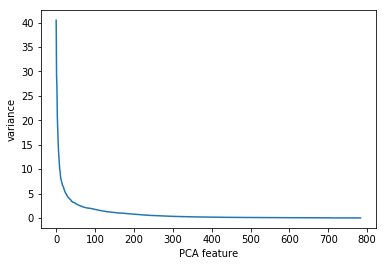

In [21]:
#Plotting the proportion variance explained 
PVE=pca.explained_variance_
plt.plot(PVE)
plt.xlabel('PCA feature')
plt.ylabel('variance')
fig1= plt.gcf()
plt.show()
fig1.savefig("pveall.png")

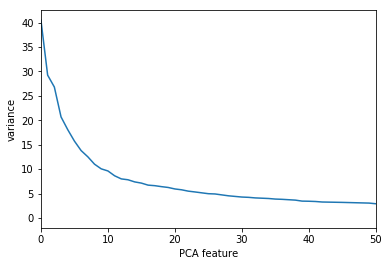

In [22]:
#Plotting the proportion variance explained 
PVE=pca.explained_variance_
plt.plot(PVE)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xlim(0,50)
fig2=plt.gcf()
plt.show()
fig2.savefig("pve50.png")

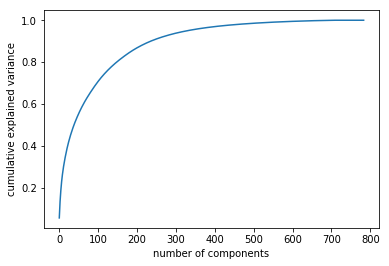

In [23]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
fig3=plt.gcf()
plt.show()
fig3.savefig("sumall.png")

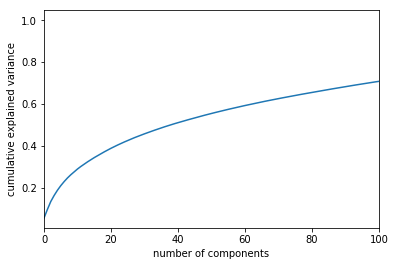

In [24]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xlim(0,100)
fig4=plt.gcf()
plt.show()
fig4.savefig("sum100.png")

In [10]:
pca2 = PCA(n_components=2)
pipeline = make_pipeline(scaler,pca2)
pipeline.fit(X_train)
transform= pipeline.transform(X_train)
#print(transform)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


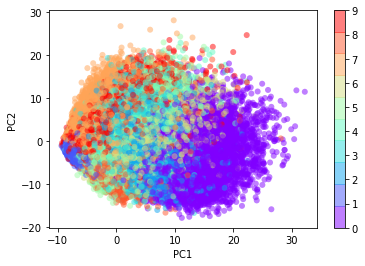

In [12]:
plt.scatter(transform[:, 0], transform[:, 1],
            c=y_train.labels, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow',10))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar();
plt.savefig("colourmap.png")

In [26]:
def drawVec(length, vector):
    slope= vector[1]/vector[0]
    x= np.arange(0,np.sqrt(length),0.01)
    y= slope*x
    return x,y


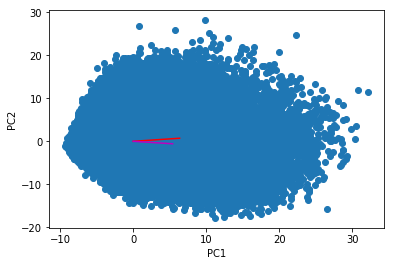

In [27]:
#Ploting the data and visualise the lines of the direction with the highest variance
dx1,dy1=drawVec(pca2.explained_variance_[0],pca2.components_[0])
dx2,dy2=drawVec(pca2.explained_variance_[1],pca2.components_[1])
plt.plot(dx1,dy1, "r")
plt.plot(dx2,dy2, "m")
plt.scatter(transform[:,0],transform[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
fig5=plt.gcf()
plt.show()
fig5.savefig("pca2.png")


In [28]:
pca3 = PCA(n_components=20)
pipeline3 = make_pipeline(scaler,pca3)
pipeline3.fit(X_train)
transform3= pipeline3.transform(X_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


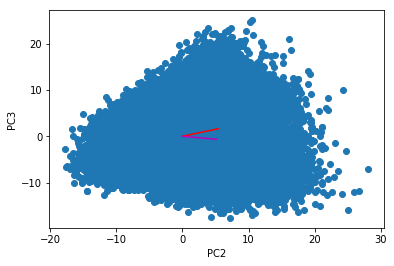

In [29]:
#Ploting the data and visualise the lines of the direction with the highest variance
dx1,dy1=drawVec(pca3.explained_variance_[1],pca3.components_[1])
dx2,dy2=drawVec(pca3.explained_variance_[2],pca3.components_[2])
plt.plot(dx1,dy1, "r")
plt.plot(dx2,dy2, "m")
plt.scatter(transform3[:,1],transform3[:,2])
plt.xlabel('PC2')
plt.ylabel('PC3')
fig6=plt.gcf()
plt.show()
fig6.savefig("pca3.png")

# 2. Support vector machines. 

a) Theory. [15 points] Explain either the mathematics or the intuition behind the kernel trick used in SVMs and how it allows to express a non-linear classifier through a linear classifier in a higher-dimensional space.

b) Practical. [15 points] Build a linear support vector classifier in Python for the MNIST classification task. Use various kernels to build a better non-linear classifier.

In [ ]:
##All the SVM kernels were run seperately as .py files on the oii server.

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics

#normalizing the data to help with the training
X_train /= 255
x_test /= 255

#Splitting the data into train and cross-validate data in order to do hyperparameter testing later
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

In [ ]:
#Building the linear svm
svm_lin= SVC(kernel="linear")
svm_lin.fit(X_train,y_train)
lin_score=svm_lin.score(X_train,y_train)
print(lin_score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Use the cross validation dataset set to determine the optimal hyperparameter cost 
cost = [0.001,0.01,0.1,1,10]
scores = []
for c in cost:
    svm_lin2 = SVC(C= c, kernel='linear')
    svm_lin2.fit(X_train, y_train)
    scores.append(svm_lin2.score(X_val,y_val))

print scores

In [ ]:
#Plotting the outcome of the cross validation
plt.figure(1, figsize=(8, 8))
plt.clf()
plt.plot(cost, scores)
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('Accuracy on validation set')
plt.xlabel('Cost parameter C')
plt.xscale('log')
plt.show()
plt.savefig("Hypertest.png")

In [ ]:
#Predicting on the test dataset
svm_lin2 = SVC(C= 1, kernel='linear')
svm_lin2.fit(X_train,y_train)
print('Accuracy on test set:',svm_lin2.score(X_test,y_test))

print("")
lin_pred = svm_lin2.predict(x_test)
fpr, tpr, _ = metrics.roc_curve(y_test, lin_pred)
print('AUC:',metrics.auc(fpr, tpr))

In [ ]:
#Building a polynomial classifier of degree 2(quadratic) using the built-in poly
cost= [2,3,4]
scores=[]
logGamma=-1
for c in cost:
    svm_poly = SVC(kernel = 'poly', degree =c , gamma=10**logGamma)
    svm_poly.fit(X_train,y_train)
    scores.append(svm_poly.score(X_val,y_val))
    
    
print('Accuracy of quadratic kernel SVM:', svm_poly.score(X_train,y_train))
print("")
print('Accuracy on test set:',svm_poly.score(x_test,y_test))

print(scores)
#Plotting the outcome of the cross validation
fig_poly=plt.plot(cost, scores)
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('Accuracy on validation set')
plt.xlabel('Cost parameter C')
plt.xscale('log')
fig_poly.savefig("Hypertestpoly.png")
plt.show()

poly_pred = svm_poly.predict(x_test)
fpr, tpr, _ = metrics.roc_curve(y_test, poly_pred)
print('AUC:',metrics.auc(fpr, tpr))

## Neural Networks. [50 points]

b) Coding. [20 points] Implement from scratch, as a Python class, a feedforward neural network with 1 hidden layer of 100 hidden units merely using basic linear algebra computations in Numpy. Based on your derivation of back-propagation, or otherwise, implement a train method based on stochastic or batch gradient descent. Test your implementation on the MNIST classification task.



In [ ]:
##This was run as a .py file in Spyder
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Normalizing the data to help with the training
X_train /= 255
X_test /= 255
n_classes = 10
#Creating dummy variable array where a binary 10x10 matrix indicates the label of the data point 
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
#Splitting the data into train and cross-validate data 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)
#Defining the sigmoid activation function
def sigmoid(s):
    return 1/(1 + np.exp(-s))
        
#Defining the softmax activation function for the output layer
def softmax(s):
    exps = np.exp(s - np.max(s, axis=1, keepdims=True))
    return exps/np.sum(exps, axis=1, keepdims=True)

 #Defining the derivation of the sigmoid function for the backprop later
def sigmoid_derv(s):
     return s * (1 - s)
            
            
def cross_entropy(pred, real):
    n_samples = real.shape[0]
    res = pred - real
    return res/n_samples
            
            
def error(pred, real):
     n_samples = real.shape[0]
     logp = - np.log(pred[np.arange(n_samples), real.argmax(axis=1)])
     loss = np.sum(logp)/n_samples
     return loss
        
print(X_train.shape)
print(y_train.shape)


class mnist_NN:
    
    
    def __init__(self, x, y):
        
        self.x = x
        self.y = y
        neurons = 100       #the number of neurons for hidden layers
        self.lr = 0.5       #the learning rate
        in_lyr = x.shape[1] #input layer size 784
        out_lyr = y.shape[1] #output layer size 10
        self.w1 = np.random.randn(in_lyr, neurons) #weights
        self.b1 = np.zeros((1, neurons))           #biases
        self.w2 = np.random.randn(neurons, out_lyr)
                
        self.b2 = np.zeros((1, out_lyr))
        
        
                
    #Feedforward: Calculates the dot product of each node of the network and uses the sigmoid as activation function 
    def feedforward(self):
        z1 = np.dot(self.x, self.w1) + self.b1
        print(self.x.shape)
        print(self.w1.shape)
        print(self.b1.shape)
        print(z1.shape)
        self.a1 = sigmoid(z1)
        z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = sigmoid(z2)
        
     #Backprop: Calculates the derivative of the error w.r.t to the weights and then propagates it backwards to the layers to adjust the weights to minimise the error   
    def backprop(self):
        loss = error(self.a2, self.y)
        print('Error :', loss)
        #Back prop calcs using the chain law
        a2_delta = cross_entropy(self.a2, self.y) # w2
        z1_delta = np.dot(a2_delta, self.w2.T)
        a1_delta = z1_delta * sigmoid_derv(self.a1) # w1
        
                
        #Updating the weights
        self.w2 -= self.lr * np.dot(self.a1.T, a2_delta)
        self.b2 -= self.lr * np.sum(a2_delta, axis=0, keepdims=True)
        self.w1 -= self.lr * np.dot(self.x.T, a1_delta)
        self.b1 -= self.lr * np.sum(a1_delta, axis=0)

        return loss
        
    def predict(self, data):
        self.x = data
        self.feedforward()
        return self.a2.argmax()
    
            
nn = mnist_NN(X_train/16.0, np.array(y_train))

def get_acc(x, y):

    acc = 0

    for xx,yy in zip(x, y):
        s = nn.predict(xx)
        if s == np.argmax(yy):
            acc +=1

    return acc/len(x)*100
epochs = 5
step_losses=[]
for x in range(epochs):
    nn.feedforward()
    step_losses.append(nn.backprop())
    
print("Training accuracy : ", get_acc(X_train/16.0, np.array(y_train)))
print("Validation accuracy : ", get_acc(X_val/16.0, np.array(y_val)))
plt.plot(step_losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
fig1 = plt.gcf()
plt.show()
fig1.savefig("netclass.png")

c) Practical. [15 points] Use TensorFlow (potentially using a frontend such as tflearn or keras) to implement a 2 layer neural network with 1200 and 1200 hidden units. Use RELU activation function instead of sigmoids, as well as add regularisation methods such as dropout to produce a model which has a test error of below 2%. 10 points will be given for building a working network and 5 point for achieving the benchmark.

In [ ]:
##This was run as a .py file in Spyder
from matplotlib import pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Normalizing the RGB codes by dividing it to the max RGB value
X_train /= 255
X_test /= 255
n_classes = 10
Y_train = np_utils.to_categorical(y_train, n_classes)# Changing the y values to dummy variables of 10x10 matrix
Y_test = np_utils.to_categorical(y_test, n_classes)
print("New shape: ", Y_train.shape)

model = Sequential()
model.add(Dense(1200, input_shape=(784,)))#
model.add(Activation('relu'))                            
model.add(Dropout(0.2)) #randomly selecting nodes to be dropped-out with a 20% probabiliy each weight update cycle

model.add(Dense(1200))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') #use metrics to print accuracy each epoch


history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

model.summary()
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
fig.savefig("Keras1.png")
plt.tight_layout()


In [ ]:
#Resources

#•	https://towardsdatascience.com/neural-networks-from-scratch-easy-vs-hard-b26ddc2e89c7


## Data Science Challenge. [5 points]

This is a problem to challenge you. Any reasonable attempt will grant you full points. For this problem (and only for this problem) you are allowed to work in groups of up to 3 students handing in the same solution. The idea is that you use this last problem as a competition between your peers or peer groups in the course. It is a continuation of problem 3.c. Using a high-level frontend for tensorflow such as tflearn or keras, try to improve your classifier by means of deeper networks and/or convolution layers which are readily available as plug&play building blocks. Depending on interest and time we can use the more challenging CIFAR10 data set for this last part as opposed to the simpler to predict MNIST dataset. In the latter case, it would also make sense to use GPUs.

In [ ]:
##This was run as a .py file in Spyder

#import pandas as pd
from matplotlib import pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = mnist.load_data()


#Building the input vector from the 28x28 pixels# Reshaping the array to 4-dims so that it can work with the Keras API
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
input_shape = (28, 28, 1)

#Normalizing the RGB codes by dividing it to the max RGB value
X_train /= 255
X_test /= 255

#Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Convolution2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="softmax"))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train,y_train, epochs=10)
val=model.evaluate(X_test, y_test)
print(val)

In [ ]:
#resources
#https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d